In [1]:
# imports
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import os
from pathlib import Path
from dotenv import load_dotenv

In [2]:
# Initialize the Panel Extensions (for Plotly)
pn.extension('plotly')

In [3]:
# Read the Mapbox API key
load_dotenv()
mapbox_token = os.getenv("MAPBOX")

# Set the Mapbox API
px.set_mapbox_access_token(mapbox_token)

In [4]:
 # Set the file paths for the CSVs using the Path class from the pathlib library
Combined_portfolio =  Path("../CSVs/combined_close_data_SP500_group_portfolio.csv")


# Read the daily closing prices of MSFT, set the `date` as a datetime index
combined_portfolio_df = pd.read_csv(Combined_portfolio, index_col=0, parse_dates=True, infer_datetime_format=True)

combined_portfolio_df.head()

SP500       ORCL     SQ       NVDA       BABA        PFE  \
2015-11-19  2081.239990  36.108597  13.07  30.458263  77.870003  27.049994   
2015-11-20  2089.169922  36.404728  12.85  30.722525  79.949997  26.957846   
2015-11-23  2086.590088  36.219639  12.12  30.262524  81.309998  26.245783   
2015-11-24  2089.139893  36.515770  12.02  30.507206  80.860001  26.781923   
2015-11-25  2088.870117  36.330700  11.90  30.468054  81.709999  27.535873   

                  NFLX        CRM          GD     AMT  ...    PSX     BLK  \
2015-11-19  120.220001  80.639999  130.626297   99.63  ...  92.38  359.09   
2015-11-20  123.839996  80.989998  130.896194  100.49  ...  91.67  362.46   
2015-11-23  125.029999  80.779999  130.077530   99.94  ...  92.17  363.25   
2015-11-24  123.309998  80.389999  130.923172   99.26  ...  93.13  356.81   
2015-11-25  124.160004  80.410004  130.608292   99.09  ...  92.77  360.62   

             TROW     JNJ     UNH     MMM     UPS     ACN     PPG     NEE  
2015-11-19  76.38  102.49  110.63  158.38  104.10  107.28  103.37  100.99  
2015-11-20  76.37  102.48  112.97  158.95  104.10  107.97  104.62  101.02  
2015-11-23  76.15  102.77  112.16  158.65  103.59  107.84  105.47  100.49  
2015-11-24  75.62  102.04  113.19  157.75  103.40  107.35  105.49   99.41  
2015-11-25  76.01  101.96  114.41  157.63  103.49  107.10  106.46   98.88  

[5 rows x 29 columns]

In [5]:
daily_returns = combined_portfolio_df.pct_change()
daily_returns.head()

daily_returns.dropna(inplace=True)

daily_returns.head()

SP500      ORCL        SQ      NVDA      BABA       PFE  \
2015-11-20  0.003810  0.008201 -0.016832  0.008676  0.026711 -0.003407   
2015-11-23 -0.001235 -0.005084 -0.056809 -0.014973  0.017011 -0.026414   
2015-11-24  0.001222  0.008176 -0.008251  0.008085 -0.005534  0.020428   
2015-11-25 -0.000129 -0.005068 -0.009983 -0.001283  0.010512  0.028151   
2015-11-27  0.000594 -0.002038  0.012605  0.008352 -0.004039 -0.002434   

                NFLX       CRM        GD       AMT  ...       PSX       BLK  \
2015-11-20  0.030111  0.004340  0.002066  0.008632  ... -0.007686  0.009385   
2015-11-23  0.009609 -0.002593 -0.006254 -0.005473  ...  0.005454  0.002180   
2015-11-24 -0.013757 -0.004828  0.006501 -0.006804  ...  0.010416 -0.017729   
2015-11-25  0.006893  0.000249 -0.002405 -0.001713  ... -0.003866  0.010678   
2015-11-27  0.010309 -0.005472  0.002617  0.005954  ... -0.000108 -0.006184   

                TROW       JNJ       UNH       MMM       UPS       ACN  \
2015-11-20 -0.000131 -0.000098  0.021152  0.003599  0.000000  0.006432   
2015-11-23 -0.002881  0.002830 -0.007170 -0.001887 -0.004899 -0.001204   
2015-11-24 -0.006960 -0.007103  0.009183 -0.005673 -0.001834 -0.004544   
2015-11-25  0.005157 -0.000784  0.010778 -0.000761  0.000870 -0.002329   
2015-11-27 -0.000789  0.004021 -0.000612  0.002284  0.006667  0.003361   

                 PPG       NEE  
2015-11-20  0.012092  0.000297  
2015-11-23  0.008125 -0.005246  
2015-11-24  0.000190 -0.010747  
2015-11-25  0.009195 -0.005331  
2015-11-27 -0.002348  0.004956  

[5 rows x 29 columns]

In [6]:
# Drop stocks that are not being used in our portfolio
#Keep the following: AMT, ORCL, PPG, COST, MSFT, UNH, TROW, BLK, NVDA, FB, BABA, CRM, PFE, NFLX, SQ

Portfolio_returns= daily_returns.drop(columns=['GD','HD','WMT', 'VZ','MCD','SBUX','CLX','PSX','JNJ','MMM','UPS','ACN','NEE'])

Core_returns= Portfolio_returns

Core_returns

SP500      ORCL        SQ      NVDA      BABA       PFE  \
2015-11-20  0.003810  0.008201 -0.016832  0.008676  0.026711 -0.003407   
2015-11-23 -0.001235 -0.005084 -0.056809 -0.014973  0.017011 -0.026414   
2015-11-24  0.001222  0.008176 -0.008251  0.008085 -0.005534  0.020428   
2015-11-25 -0.000129 -0.005068 -0.009983 -0.001283  0.010512  0.028151   
2015-11-27  0.000594 -0.002038  0.012605  0.008352 -0.004039 -0.002434   
...              ...       ...       ...       ...       ...       ...   
2020-09-25  0.015977  0.008432  0.035520  0.042578  0.005042  0.008110   
2020-09-28  0.016111 -0.003679  0.019275  0.012526  0.018149  0.009431   
2020-09-29 -0.004813 -0.001846  0.025193  0.014634  0.003333 -0.006046   
2020-09-30  0.008254  0.003867 -0.013713  0.023042  0.061568  0.014653   
2020-10-01  0.005293 -0.000335  0.036543  0.006208 -0.013368 -0.008992   

                NFLX       CRM       AMT        FB      MSFT      COST  \
2015-11-20  0.030111  0.004340  0.008632  0.009976  0.004635  0.001658   
2015-11-23  0.009609 -0.002593 -0.005473 -0.003448  0.000000  0.002146   
2015-11-24 -0.013757 -0.004828 -0.006804 -0.011314  0.001107 -0.007709   
2015-11-25  0.006893  0.000249 -0.001713 -0.003121 -0.010323  0.001233   
2015-11-27  0.010309 -0.005472  0.005954  0.000379  0.004470  0.007328   
...              ...       ...       ...       ...       ...       ...   
2020-09-25  0.020715  0.021848  0.015370  0.021200  0.022787 -0.012738   
2020-09-28  0.016091  0.016190  0.000792  0.007849  0.007795  0.020550   
2020-09-29  0.005768  0.003162  0.000500  0.019352 -0.010409  0.007208   
2020-09-30  0.013273  0.015640  0.006705  0.000420  0.014812  0.008122   
2020-10-01  0.054957  0.008475  0.001737  0.018060  0.010127  0.009746   

                 BLK      TROW       UNH       PPG  
2015-11-20  0.009385 -0.000131  0.021152  0.012092  
2015-11-23  0.002180 -0.002881 -0.007170  0.008125  
2015-11-24 -0.017729 -0.006960  0.009183  0.000190  
2015-11-25  0.010678  0.005157  0.010778  0.009195  
2015-11-27 -0.006184 -0.000789 -0.000612 -0.002348  
...              ...       ...       ...       ...  
2020-09-25  0.023848  0.014502  0.033623  0.010929  
2020-09-28  0.019788  0.026593  0.002413  0.012391  
2020-09-29 -0.006892 -0.008246  0.003034 -0.011582  
2020-09-30  0.015771  0.005726  0.025053  0.014543  
2020-10-01  0.007737 -0.001404  0.004170 -0.002457  

[1224 rows x 16 columns]

In [7]:
# Use the `dot` function to multiply the weights by each stock's daily return to get the portfolio daily return
weights = [0.40,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,]
core_portfolio_returns = Core_returns.dot(weights)
core_portfolio_returns.head()

2015-11-20    0.006532
2015-11-23   -0.003925
2015-11-24   -0.000940
2015-11-25    0.002003
2015-11-27    0.001257
dtype: float64

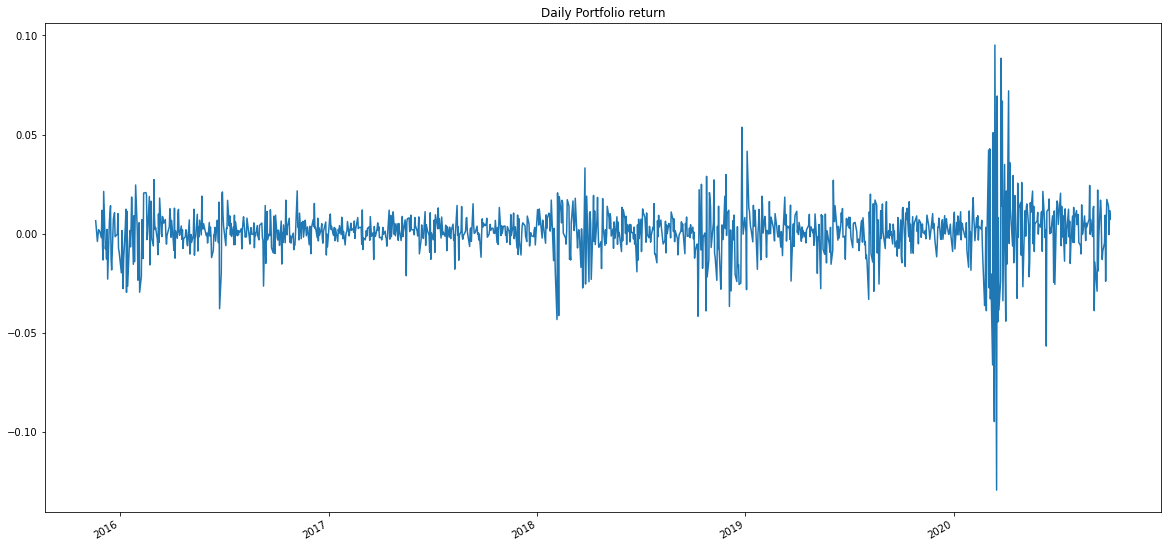

In [8]:
 # plot the daily portfolio returns
core_portfolio_returns.plot(figsize=(20,10), title="Daily Portfolio return"); 

In [9]:
# Calculating Cumulative Product
core_cumulative_returns = (1 + core_portfolio_returns).cumprod() - 1
core_cumulative_returns

2015-11-20    0.006532
2015-11-23    0.002581
2015-11-24    0.001639
2015-11-25    0.003645
2015-11-27    0.004906
                ...   
2020-09-25    1.474158
2020-09-28    1.508525
2020-09-29    1.507425
2020-09-30    1.536714
2020-10-01    1.555398
Length: 1224, dtype: float64

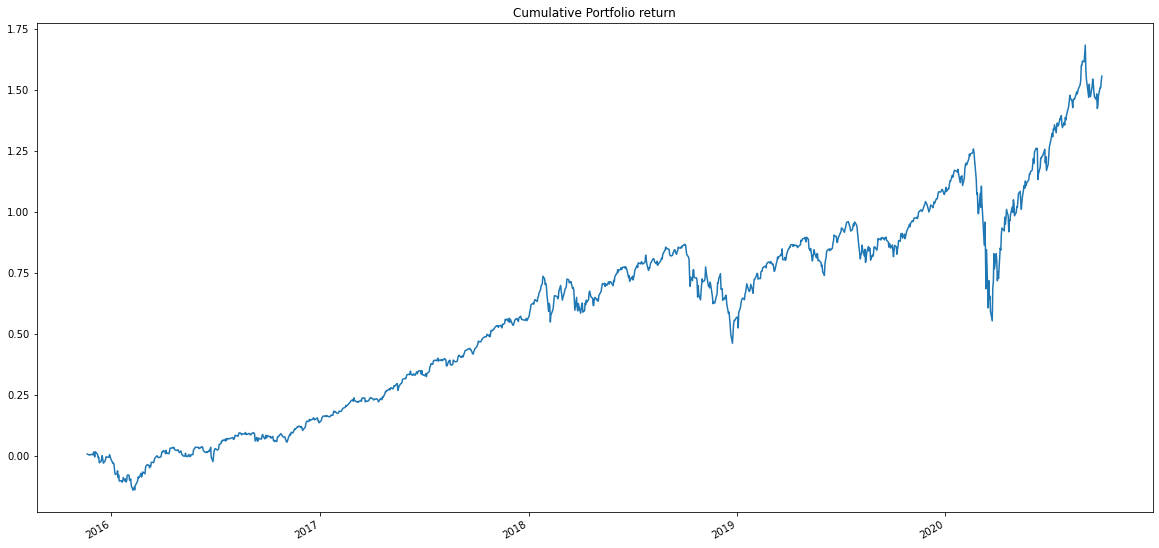

In [10]:
core_cumulative_returns.plot(figsize=(20,10), title="Cumulative Portfolio return");

In [11]:
#SP500 daily returns

SP500_daily_returns= Core_returns.drop(columns=['AMT', 'ORCL', 'PPG', 'COST', 'MSFT', 'UNH', 'TROW', 'BLK', 'NVDA', 'FB', 'BABA', 'CRM', 'PFE', 'NFLX', 'SQ'])

SP500_daily_returns

SP500
2015-11-20  0.003810
2015-11-23 -0.001235
2015-11-24  0.001222
2015-11-25 -0.000129
2015-11-27  0.000594
...              ...
2020-09-25  0.015977
2020-09-28  0.016111
2020-09-29 -0.004813
2020-09-30  0.008254
2020-10-01  0.005293

[1224 rows x 1 columns]

In [12]:
# Calculating Cumulative Product for SP500
Sp500_cumulative_returns = (1 + SP500_daily_returns).cumprod() - 1
Sp500_cumulative_returns

SP500
2015-11-20  0.003810
2015-11-23  0.002571
2015-11-24  0.003796
2015-11-25  0.003666
2015-11-27  0.004262
...              ...
2020-09-25  0.584853
2020-09-28  0.610386
2020-09-29  0.602636
2020-09-30  0.615864
2020-10-01  0.624416

[1224 rows x 1 columns]

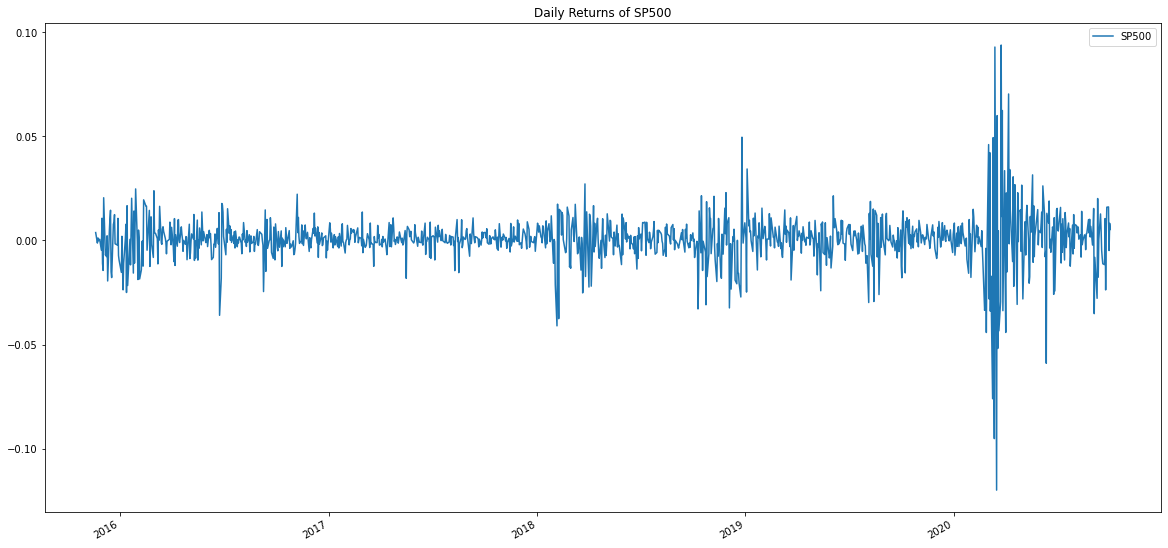

In [13]:
SP500_daily_returns.plot(figsize=(20,10), title="Daily Returns of SP500");

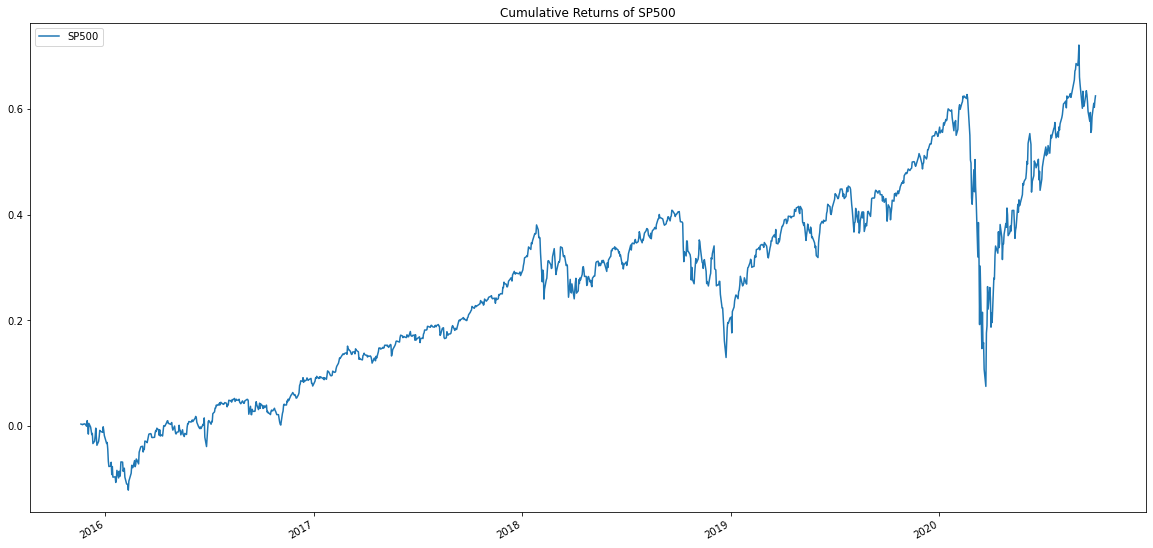

In [14]:
Sp500_cumulative_returns.plot(figsize=(20,10), title="Cumulative Returns of SP500");

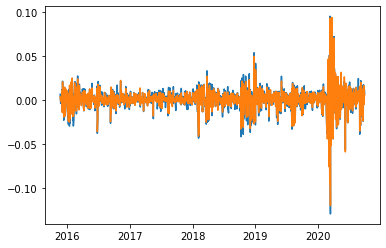

In [15]:
plt.plot(core_portfolio_returns)
plt.plot(SP500_daily_returns)

In [16]:
#calculate Std Dev of Portfolio

print(core_portfolio_returns.std())
print(core_portfolio_returns.mean())

0.013021605893950699
0.0008521218194888947


In [18]:
portfolio_5yrs = combined_portfolio_df.drop(columns=['MCD', 'VZ', 'JNJ', 'CLX', 'WMT', 'NEE', 'GD', 'MMM', 'ACN', 'UPS', 'HD', 'SBUX', 'PSX'])
portfolio_5yrs

SP500       ORCL          SQ        NVDA        BABA  \
2015-11-19  2081.239990  36.108597   13.070000   30.458263   77.870003   
2015-11-20  2089.169922  36.404728   12.850000   30.722525   79.949997   
2015-11-23  2086.590088  36.219639   12.120000   30.262524   81.309998   
2015-11-24  2089.139893  36.515770   12.020000   30.507206   80.860001   
2015-11-25  2088.870117  36.330700   11.900000   30.468054   81.709999   
...                 ...        ...         ...         ...         ...   
2020-09-25  3298.459961  59.799999  157.720001  514.950012  271.089996   
2020-09-28  3351.600098  59.580002  160.759995  521.400024  276.010010   
2020-09-29  3335.469971  59.470001  164.809998  529.030029  276.929993   
2020-09-30  3363.000000  59.700001  162.550003  541.219971  293.980011   
2020-10-01  3380.800049  59.680000  168.490005  544.580017  290.049988   

                  PFE        NFLX         CRM     AMT      FB    MSFT    COST  \
2015-11-19  27.049994  120.220001   80.639999   99.63  106.26   53.94  162.83   
2015-11-20  26.957846  123.839996   80.989998  100.49  107.32   54.19  163.10   
2015-11-23  26.245783  125.029999   80.779999   99.94  106.95   54.19  163.45   
2015-11-24  26.781923  123.309998   80.389999   99.26  105.74   54.25  162.19   
2015-11-25  27.535873  124.160004   80.410004   99.09  105.41   53.69  162.39   
...               ...         ...         ...     ...     ...     ...     ...   
2020-09-25  36.049999  482.880005  242.740005  239.81  254.82  207.82  342.58   
2020-09-28  36.389999  490.649994  246.669998  240.00  256.82  209.44  349.62   
2020-09-29  36.169998  493.480011  247.449997  240.12  261.79  207.26  352.14   
2020-09-30  36.700001  500.029999  251.320007  241.73  261.90  210.33  355.00   
2020-10-01  36.369999  527.510010  253.449997  242.15  266.63  212.46  358.46   

               BLK    TROW     UNH     PPG  
2015-11-19  359.09   76.38  110.63  103.37  
2015-11-20  362.46   76.37  112.97  104.62  
2015-11-23  363.25   76.15  112.16  105.47  
2015-11-24  356.81   75.62  113.19  105.49  
2015-11-25  360.62   76.01  114.41  106.46  
...            ...     ...     ...     ...  
2020-09-25  547.81  125.22  302.50  120.25  
2020-09-28  558.65  128.55  303.23  121.74  
2020-09-29  554.80  127.49  304.15  120.33  
2020-09-30  563.55  128.22  311.77  122.08  
2020-10-01  567.91  128.04  313.07  121.78  

[1225 rows x 16 columns]

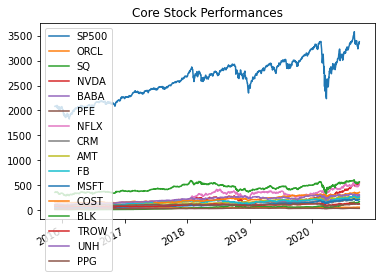

In [19]:
portfolio_5yrs.plot(title='Core Stock Performances');

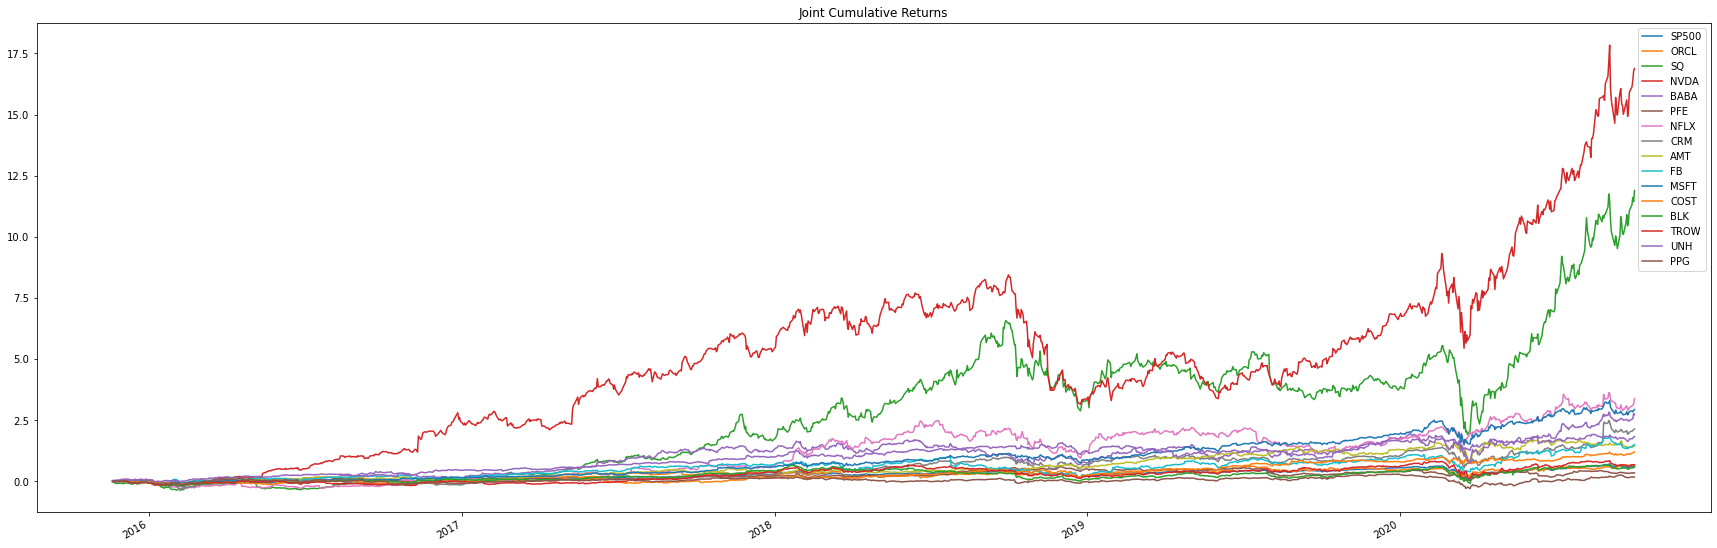

In [20]:
portfolio_5yrs_daily = portfolio_5yrs.pct_change()
portfolio_5yrs_1 = (1 + portfolio_5yrs_daily).cumprod() - 1
portfolio_5yrs_1.plot(figsize=(30,10), title='Joint Cumulative Returns');

In [30]:
# Create Plots
def get_daily_sp500_plot():
    SP500_daily_returns_1= SP500_daily_returns.plot(title='S&P 500 Daily Returns', figsize=(20,10))
    return SP500_daily_returns_1

def get_daily_core_plot():
    core_portfolio_returns_1= core_portfolio_returns.plot(title='Portfolio Daily Returns', figsize=(20,10))
    return core_portfolio_returns_1

def get_cumulative_sp500_plot():
    sp500_cumulative_returns_1= Sp500_cumulative_returns.plot(title='S&P 500 Cumulative Returns', figsize=(20,10))
    return sp500_cumulative_returns_1

def get_cumulative_portfolio_plot():
    core_cumulative_returns_1= core_cumulative_returns.plot(title='Portfolio Cumulative Returns', figsize=(20,10))
    return core_cumulative_returns

def get_cumulative_joint_plot():
    portfolio_5yrs_2= portfolio_5yrs_1.plot(title='Securities Cumulative Returns', figsize=(20,10))
    return portfolio_5yrs_2

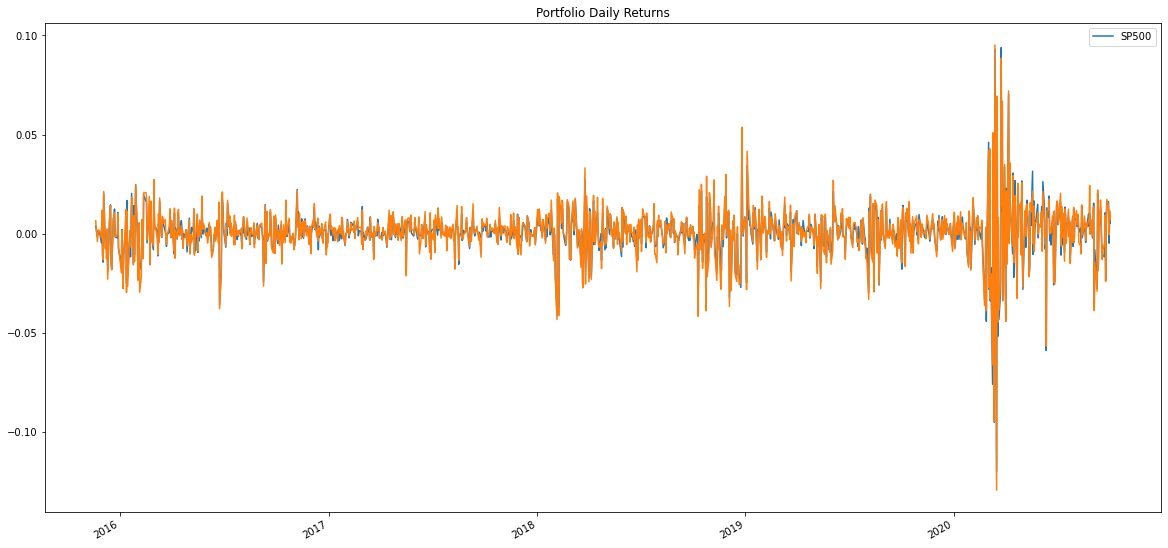

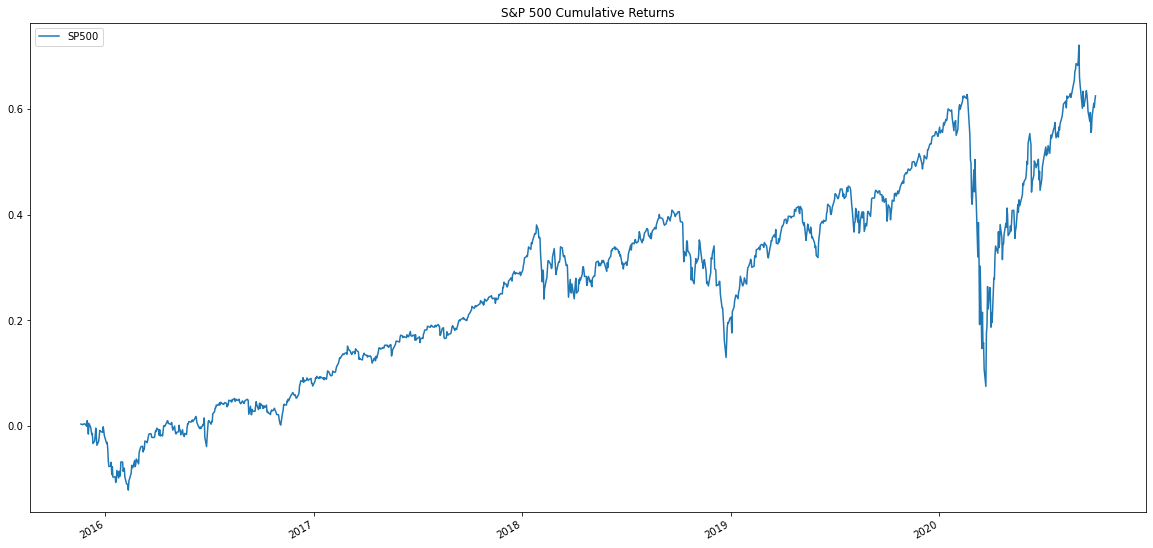

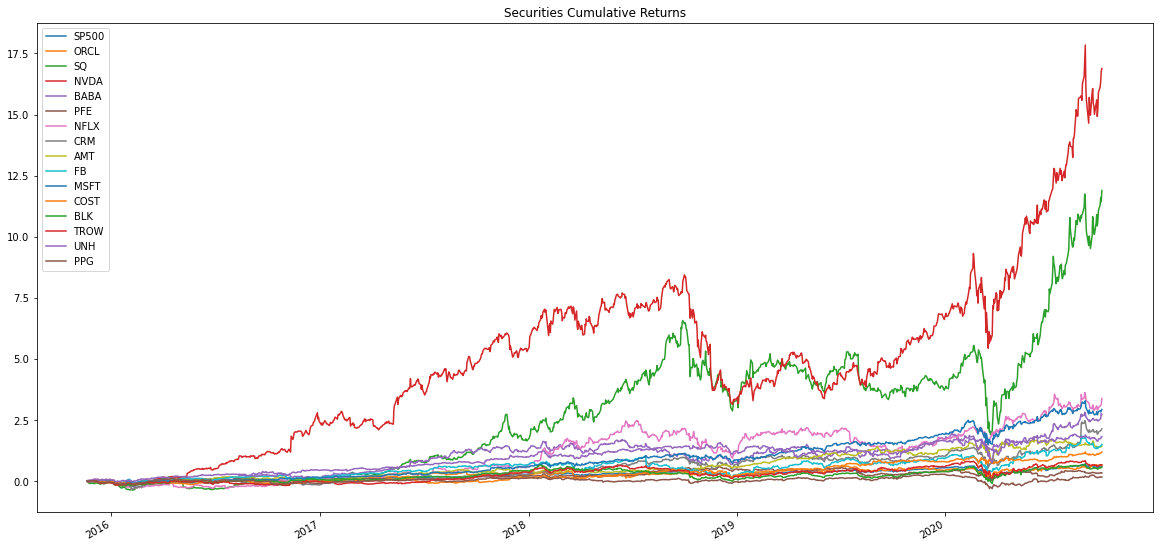

In [37]:
# Create panels to structure the layout of the dashboard
daily_column = pn.Column("Daily Returns", get_daily_sp500_plot(), get_daily_core_plot())


cumulative_column = pn.Column(
    "Cumulative Returns", get_cumulative_sp500_plot(),)

joint_column = pn.Column(
    "Joint Returns", get_cumulative_joint_plot())

In [38]:
# Create tabs
dashboard = pn.Tabs(
    ("Daily", daily_column), 
    ("Cumulative", cumulative_column), 
    ("Joint", joint_column))

In [39]:
dashboard.servable()

Tabs
    [0] Column
        [0] Markdown(str)
        [1] Str(AxesSubplot)
        [2] Str(AxesSubplot)
    [1] Column
        [0] Markdown(str)
        [1] Str(AxesSubplot)
    [2] Column
        [0] Markdown(str)
        [1] Str(AxesSubplot)